# Analisis Bank Churn 

import libarary

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Bussiness case

Profil Pelanggan Berisiko:

Bagaimana distribusi CreditScore, Age, Balance, dan EstimatedSalary untuk pelanggan yang Exited (keluar) dibandingkan dengan mereka yang tidak?

Apakah ada perbedaan signifikan dalam tingkat churn antara jenis kelamin (Gender) dan negara (Geography)?

Perilaku & Layanan Pelanggan:

Bagaimana jumlah produk yang dimiliki (NumOfProducts) dan status keanggotaan aktif (IsActiveMember) memengaruhi tingkat churn?

Apakah pelanggan dengan Tenure (lama berlangganan) yang lebih pendek atau lebih panjang memiliki kecenderungan churn yang lebih tinggi?

Model Prediksi & Aksi:

Berdasarkan semua fitur yang ada, bisakah kita membangun model klasifikasi untuk memprediksi probabilitas seorang pelanggan akan keluar (Exited)?

Jika model berhasil, apa rekomendasi strategis yang bisa diberikan kepada tim marketing atau layanan pelanggan untuk mengurangi tingkat churn?

In [2]:
path = 'Bank_Churn.csv'

bank_df = pd.read_csv(path)
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


overview dataset

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
# set panda max columns
pd.set_option('display.max_columns', len(bank_df))
pd.set_option("display.max_rows", 101)

# menampilkan 100 column dan baris teratas pada data
bank_df.head(101)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# melihat dimensi data 
row, columns = bank_df.shape

print(f"baris pada bank_df adalah {row} dan jumlah columns pada bank_df adalah {columns}")

baris pada bank_df adalah 10000 dan jumlah columns pada bank_df adalah 13


In [6]:
bank_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
bank_df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
bank_df.loc[:, ['Balance']]

,Balance
0,0.00
1,83807.86
2,159660.80
3,0.00
4,125510.82
...,...
9995,0.00
9996,57369.61
9997,0.00
9998,75075.31


# Preprocessing

In [9]:
import copy

In [10]:
bank_copy = bank_df

In [11]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [12]:
bank_copy.duplicated().sum()

np.int64(0)

handle missing values

In [13]:
nan_col = bank_copy.isna().sum().sort_values(ascending=False)
nan_col

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
n_data = len(bank_copy)

percent_nan_col = (n_data/nan_col) * 100 
percent_nan_col

CustomerId         inf
Surname            inf
CreditScore        inf
Geography          inf
Gender             inf
Age                inf
Tenure             inf
Balance            inf
NumOfProducts      inf
HasCrCard          inf
IsActiveMember     inf
EstimatedSalary    inf
Exited             inf
dtype: float64

# Analysis

Bagaimana distribusi CreditScore, Age, Balance, dan EstimatedSalary untuk pelanggan yang Exited (keluar) dibandingkan dengan mereka yang tidak?

In [15]:
distribusi_kolom = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
bank_copy.groupby('Exited')[distribusi_kolom]
presetase_churn = bank_copy['Exited'].value_counts(normalize=True) * 100
print("\nPresentase Pelanggan Churn vs Tidak Churn:")
print(presetase_churn)


Presentase Pelanggan Churn vs Tidak Churn:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


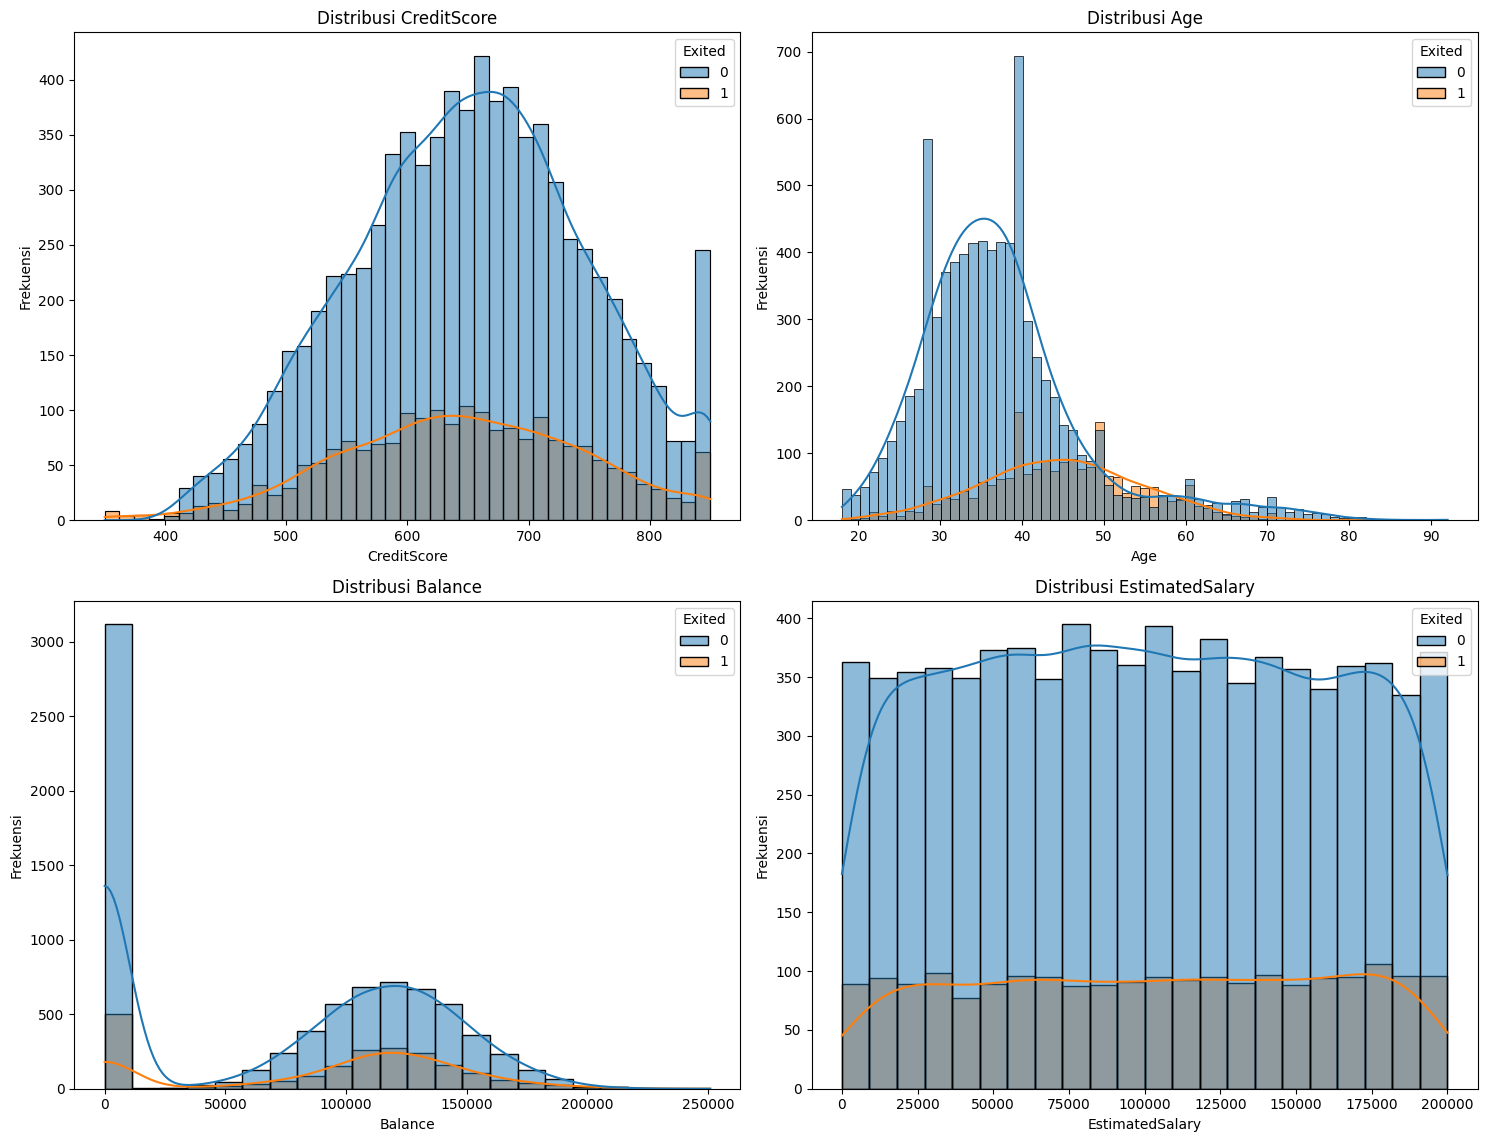

In [16]:
columns_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# buat grid subplot untuk visualisasi
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 12))

for i, kolom in enumerate(columns_to_plot):
 row_pos = i // 2
 col_pos = i  % 2
 ax = axes[row_pos, col_pos]
 
 # gunakan hisplot dengan hue='Exited' untuk membandingkan distribusi
 sns.histplot(data=bank_copy, x=kolom, hue='Exited', kde=True, ax=ax)
 ax.set_title(f"Distribusi {kolom}")
 ax.set_xlabel(kolom)
 ax.set_ylabel('Frekuensi')
 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Apakah ada perbedaan signifikan dalam tingkat churn antara jenis kelamin (Gender) dan negara (Geography)?

Analisis churn berdasarkan Gender

In [17]:
churn_gender = bank_copy.groupby('Gender')['Exited'].mean().reset_index()
print('Tingkat Churn Berdasarkan Jenis Kelamin:')
print(churn_gender)

Tingkat Churn Berdasarkan Jenis Kelamin:
   Gender    Exited
0  Female  0.250715
1    Male  0.164559


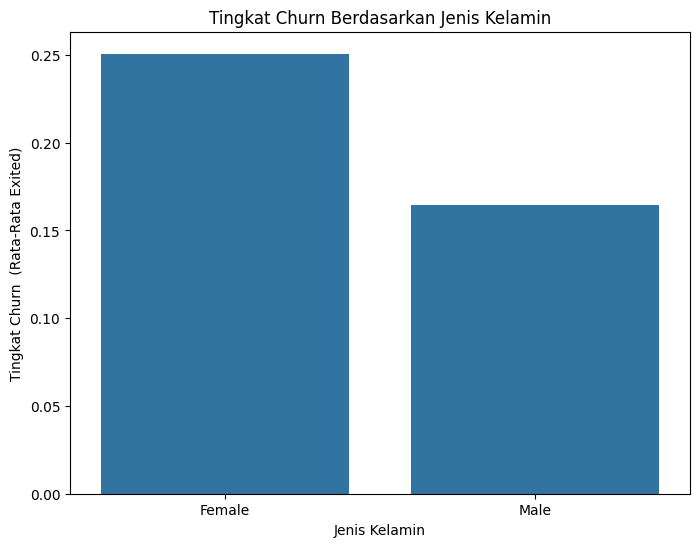

In [18]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y='Exited', data=churn_gender)
plt.title("Tingkat Churn Berdasarkan Jenis Kelamin")
plt.xlabel('Jenis Kelamin')
plt.ylabel('Tingkat Churn  (Rata-Rata Exited)')
plt.show()

Analisis Churn berdasarkan Geography

In [19]:
churn_geo = bank_copy.groupby('Geography')['Exited'].mean().reset_index()
print(f"Distribusi Persebaran churn Berdasarkan Gepgraphy:")
print(churn_geo)

Distribusi Persebaran churn Berdasarkan Gepgraphy:
  Geography    Exited
0    France  0.161548
1   Germany  0.324432
2     Spain  0.166734


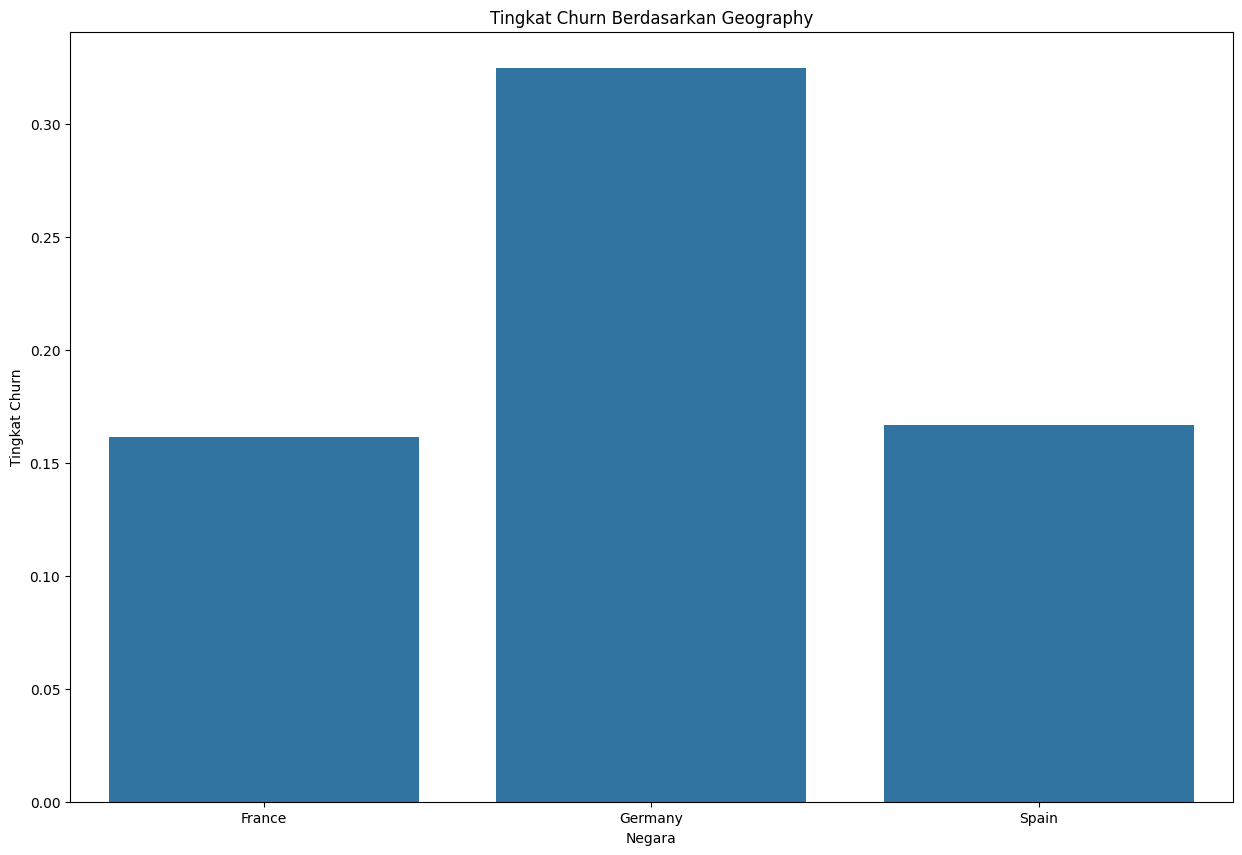

In [20]:
# Visualisasi 
plt.figure(figsize=(15, 10))
sns.barplot(x='Geography', y='Exited', data=churn_geo)
plt.title("Tingkat Churn Berdasarkan Geography")
plt.xlabel('Negara')
plt.ylabel("Tingkat Churn")
plt.show()

insight:

pertanyaan no 1
- distribusi CreditScore, Age, Balance dan EstimatedSalary terhadap pelanggan yang churn lebih sedikit dibandingkan dengan pelanggan yang tidak churn

- pelanggan yang churn sebanyak 79.63%, sedangkan yang tidak chrun sebanyak 20.37 persen

pertanyaan no 2 
- Gender perempuan, adalah gender yang paling banyak melakukan churn dengan presentase sebesar 25%
- Negara germany adalah daerah yang paling banyak melakukan churn dengan presentase sebesar 32%



Bagaimana jumlah produk yang dimiliki (NumOfProducts) dan status keanggotaan aktif (IsActiveMember) memengaruhi tingkat churn?

In [21]:
jumlah_produk = bank_copy.groupby('NumOfProducts')['Exited'].mean().reset_index()
print(f"Tingkat Churn berdasarkan jumlah produk")
print(jumlah_produk)

Tingkat Churn berdasarkan jumlah produk
   NumOfProducts    Exited
0              1  0.277144
1              2  0.075817
2              3  0.827068
3              4  1.000000


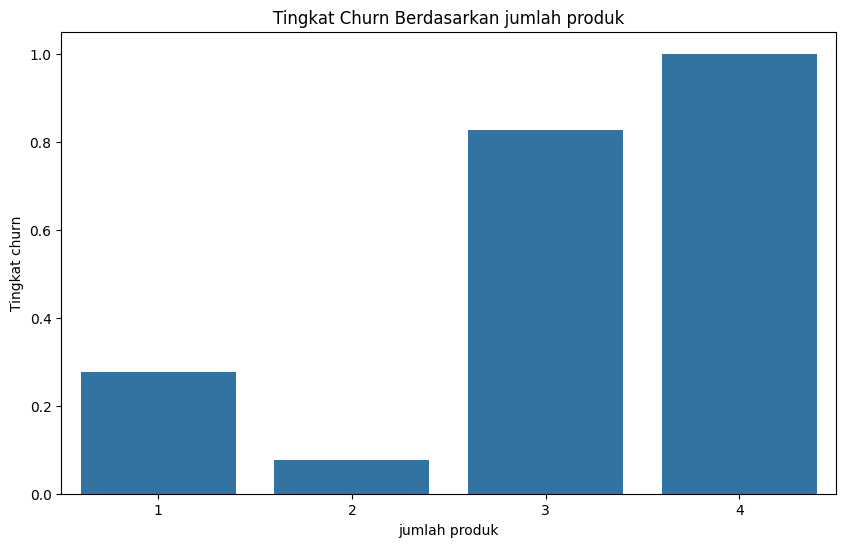

In [22]:
# visualisasi 
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=jumlah_produk)
plt.title("Tingkat Churn Berdasarkan jumlah produk")
plt.xlabel("jumlah produk")
plt.ylabel('Tingkat churn')
plt.show()

In [23]:
churn_rate_active = bank_copy.groupby("IsActiveMember")['Exited'].mean().reset_index()
print('Analisis Churn berdasarkan status anggota aktif')

mapping_dict = {0: False, 1:True}
churn_rate_active['IsActiveMember'] = churn_rate_active['IsActiveMember'].map(mapping_dict)
print(churn_rate_active)

Analisis Churn berdasarkan status anggota aktif
   IsActiveMember    Exited
0           False  0.268509
1            True  0.142691


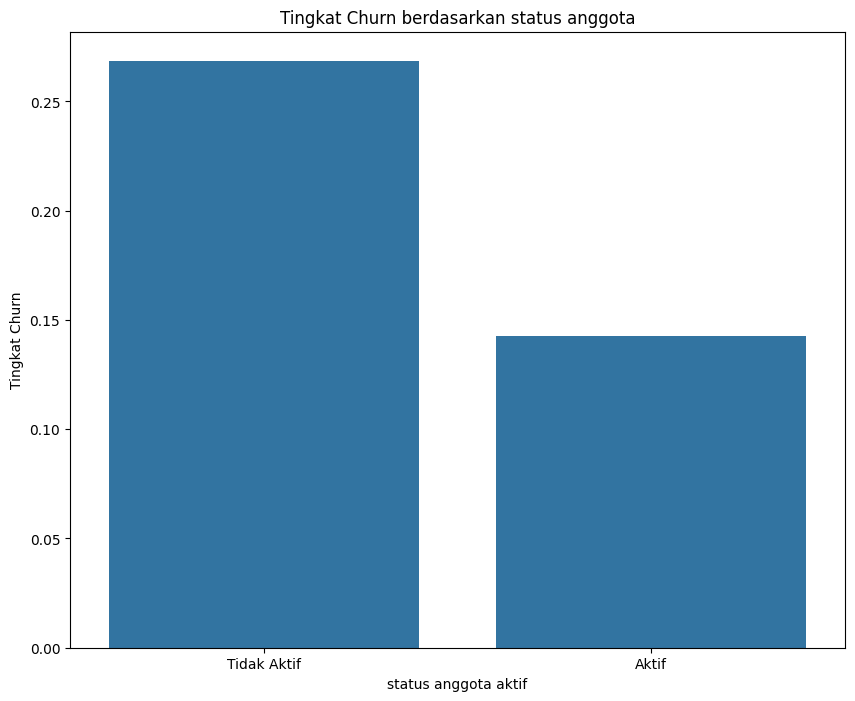

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x='IsActiveMember', y='Exited', data=churn_rate_active)
plt.title("Tingkat Churn berdasarkan status anggota")
plt.xlabel("status anggota aktif")
plt.ylabel("Tingkat Churn")
plt.xticks([0, 1], ['Tidak Aktif', 'Aktif'])
plt.show()

Apakah pelanggan dengan Tenure (lama berlangganan) yang lebih pendek atau lebih panjang memiliki kecenderungan churn yang lebih tinggi?

In [25]:
tenure = bank_copy.groupby('Tenure')['Exited'].mean().reset_index()
print('Tingkat churn pelanggan berdasaran Tenure')
print(tenure)

Tingkat churn pelanggan berdasaran Tenure
    Tenure    Exited
0        0  0.230024
1        1  0.224155
2        2  0.191794
3        3  0.211100
4        4  0.205258
5        5  0.206522
6        6  0.202689
7        7  0.172179
8        8  0.192195
9        9  0.216463
10      10  0.206122


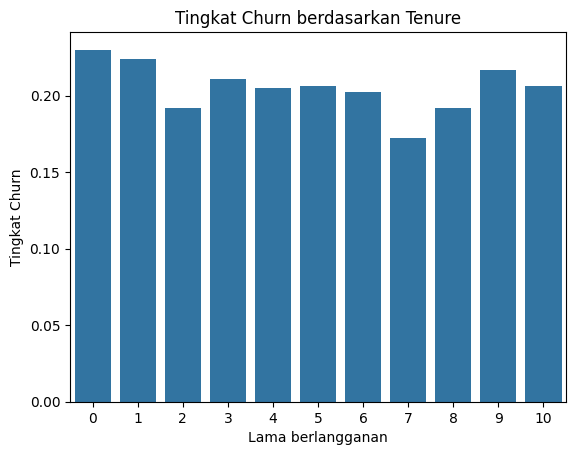

In [26]:
plt.Figure(figsize=(8, 10))
sns.barplot(x='Tenure', y='Exited', data=tenure)
plt.title("Tingkat Churn berdasarkan Tenure")
plt.xlabel("Lama berlangganan")
plt.ylabel('Tingkat Churn')
plt.show()

insight:

pertanyaan 1
- dari hasil analisis, semakin banyak jumlah produk maka akan semakin banyak yang churn, dengan presentase churn paling tinggi mencapai 100 persen
-  pelanggan yang bukan member aktif mengalami churn lebih banyak daripda pelanggan dengan member aktif. 


pertanyaan 2
- semakin singkat masa berlangganan, maka semkain tinggi tingkat churn

# Split Data 

In [27]:
bank_copy.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
output_data = bank_copy['Exited']

In [29]:
output_data.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [30]:
input_data = bank_copy.drop(['Exited', 'Surname', 'CustomerId'],
                        axis=1)

In [31]:
output_data = bank_copy['Exited']
input_data = bank_copy.drop(['Exited'],
                        axis = 1)

In [32]:
def InputOutput(data, 
               output_columns_name):
 output_data = data[output_columns_name]
 input_data = data.drop([output_columns_name],
                        axis = 1)
 
 return input_data, output_data

In [33]:
x, y = InputOutput(data = bank_copy, 
                  output_columns_name='Exited' )

cek kembali dimensi data

In [34]:
x.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [35]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                                    test_size= 0.3,
                                                    random_state= 12 )

In [38]:
# lihat dimensi data
print(X_train.shape)
print(Y_train.shape)

(7000, 12)
(7000,)


In [39]:
X_test.shape[0] / Y_test.shape[0]

1.0

# Preprocessing categorical variabel

In [40]:
from sklearn.preprocessing import StandardScaler

In [50]:
x_train_clean = X_train.drop(columns=['CustomerId', 'Surname'], errors='ignore')
x_test_clean = X_test.drop(columns=['CustomerId', 'Surname'], errors='ignore')

In [51]:
numerik_columns = x_train_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = x_train_clean.select_dtypes(include=['object']).columns

In [52]:
x_train_encoded = pd.get_dummies(x_train_clean, columns=categorical_columns, drop_first=True)

In [53]:
scaler = StandardScaler()
x_train_clean[numerik_columns] = scaler.fit_transform(x_train_clean[numerik_columns])

In [54]:
print(x_train_clean.head())

      CreditScore Geography  Gender       Age    Tenure   Balance  \
6097    -0.782816   Germany    Male  0.771041  1.369052  0.501446   
6704    -2.223579   Germany    Male  0.580932 -0.711499  0.444031   
9844     0.077496    France  Female  0.105660 -0.017982  1.073699   
9731    -0.451129   Germany    Male -0.939940  0.675535  0.416260   
6183    -0.409668    France    Male  1.341369 -0.711499  0.110620   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
6097       0.816177    0.64487        0.965454        -0.631316  
6704       0.816177    0.64487        0.965454         1.464225  
9844      -0.910921    0.64487        0.965454         1.570103  
9731      -0.910921    0.64487       -1.035783         1.110290  
6183      -0.910921   -1.55070       -1.035783        -1.717000  


# Training Machine Learning

In [45]:
Y_train.value_counts(normalize=True)

Exited
0    0.801286
1    0.198714
Name: proportion, dtype: float64

# import model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()
knn.fit(x_train_encoded, Y_train)

KNeighborsClassifier()

# Cek akurasi

In [58]:
benchmark = Y_train.value_counts(normalize= True)[0]
benchmark

np.float64(0.8012857142857143)